In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from glob import glob

In [4]:
car_files = glob('oriented_patches/*.jpg')

In [7]:
car_file = car_files[0]
print car_file

oriented_patches\0013499a8fdc51fc487f96a88d777ea3.jpg


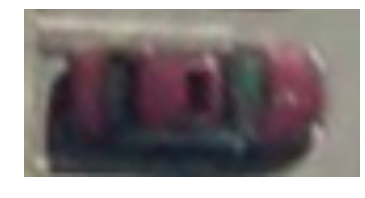

In [11]:
car = imread(car_file)
imshow(car)
axis('off');

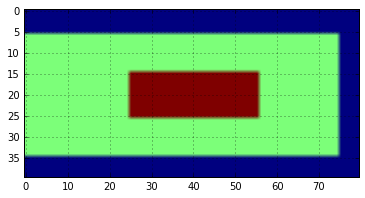

In [23]:
trimap = ones(car.shape[:2])*.5
trimap[15:26, 25:56] = 1
trimap[:6,:] = trimap[-5:,:] = 0
trimap[:,-5:] = 0
imshow(trimap)
grid()

In [29]:
import maxflow

In [59]:
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries

In [62]:
g = maxflow.Graph[float](trimap.size, trimap.size*4 - 2*sum(trimap.shape))
nodes = g.add_grid_nodes(trimap.shape)
beta = 20

car = img_as_float(car)

# Horizontal edges
hstructure = [[0,0,1]]
hweights = np.zeros_like(trimap)
hweights[:,:-1] = sqrt(sum((car[:,1:]-car[:,:-1])**2, 2))

g.add_grid_edges(nodes, weights=beta*hweights, structure=hstructure, symmetric=True)

#Vertical edges
vstructure = array([[0,0,1]]).T
vweights = np.zeros_like(trimap)
vweights[:-1,:] = sqrt(sum((car[1:,:]-car[:-1,:])**2, 2))
g.add_grid_edges(nodes, weights=beta*vweights, structure=vstructure, symmetric=True)

In [63]:
g.add_grid_tedges(nodes, 0xFFFF*(trimap==0), 0xFFFF*(trimap==1))

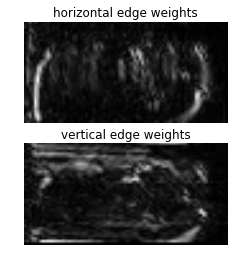

In [64]:
subplot(2,1,1);
gray()
imshow(hweights)
axis('off')
title('horizontal edge weights')

subplot(2,1,2)
gray()
imshow(vweights)
axis('off')
title('vertical edge weights')

In [65]:
flow = g.maxflow()
print flow

50.4486816546


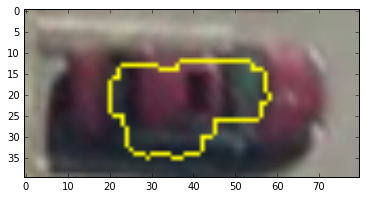

In [66]:
mask = g.get_grid_segments(nodes)
imshow(mark_boundaries(car, mask.astype(int)))